In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from __future__ import absolute_import

In [2]:
from extract_data import *
from finbeat_calc import *
from plot_track import *
from plot_accel import *
from check_plots import *
from plot_analysis import *
from make_subset import *
import pywt
import pylab
import numpy as np

# Take position data from hardcoded folder, calc. velocities, accels
tracklist = extract_data()

# Calculate finbeat peaks and troughs

finbeats, finbeat_byP, finbeat_byT = finbeat_calc(tracklist.keys(), tracklist)

# Extract finbeat periods, amplitudes, and subsequent accel

# Plot things if desired
# plot_track(['sometrial'], tracklist)
# plot_accel(['sometrial'], tracklist)

# """If you want to plot the peaks and troughs on the position data,
# uncomment section in finbeat_calc"""

C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Anaconda3\

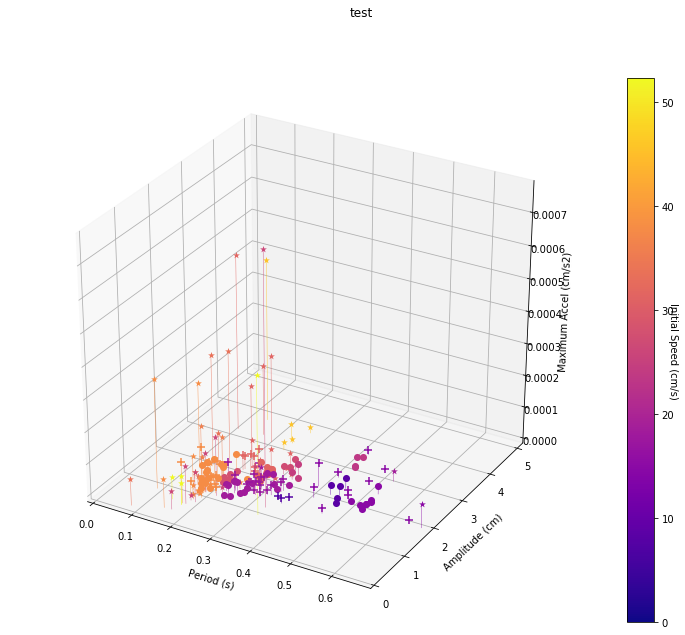

181


In [3]:
plot_analysis("test",tracklist.keys(), finbeat_byP, tracklist)

In [4]:
bass_subset = make_subset(group_by1='species', identifier1='Bass', tracklist=tracklist)
trout_subset = make_subset(group_by1 = 'species', identifier1 ='BTrout', tracklist=tracklist)
#bass_burst_subset = make_subset(group_by= '')
#bass_steady_subset = 
print(sorted(bass_subset))
print(sorted(trout_subset))
print(len(bass_subset)+len(trout_subset))
print(len(tracklist.keys()))


['Bass1S01', 'Bass1S02', 'Bass1S03', 'Bass1S04', 'Bass1S05', 'Bass1S06', 'Bass1S07', 'Bass1S08', 'Bass1S09', 'Bass1S10', 'Bass1S11', 'Bass1S12', 'Bass1S13', 'Bass1S14', 'Bass1S15', 'Bass1S16', 'Bass1S17', 'Bass1S18', 'Bass1S19', 'Bass1S20', 'Bass1S21', 'Bass1S22', 'Bass1S23']
['BTrout1S01', 'BTrout1S02', 'BTrout1S03', 'BTrout1S04', 'BTrout1S05', 'BTrout1S06', 'BTrout1S07a', 'BTrout1S08', 'BTrout1S09', 'BTrout1S10', 'BTrout1S11', 'BTrout2S01', 'BTrout2S02', 'BTrout2S03', 'BTrout2S04', 'BTrout2S05', 'BTrout2S07', 'BTrout2S08', 'BTrout2S09', 'BTrout2S10', 'BTrout2S14a']
44
44


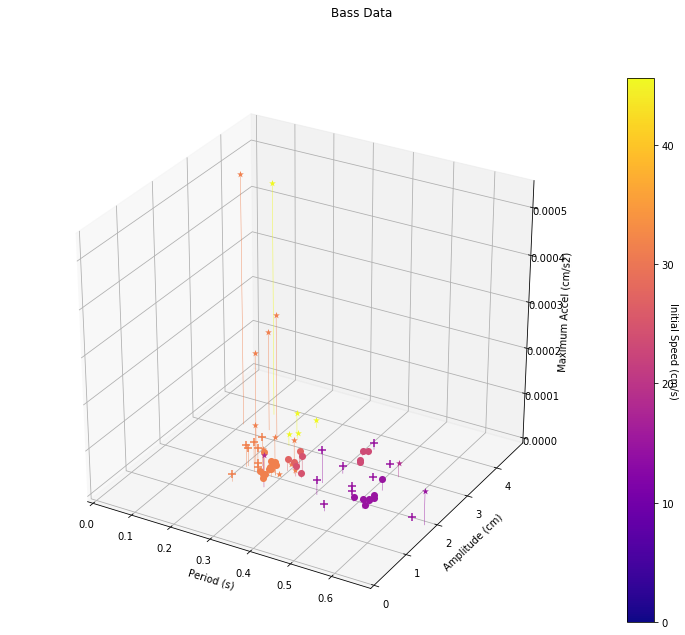

67


C:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:343: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


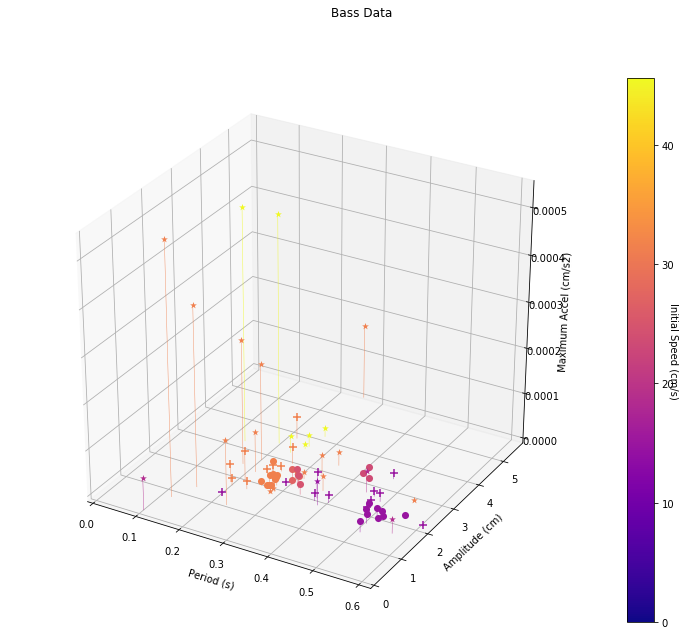

74


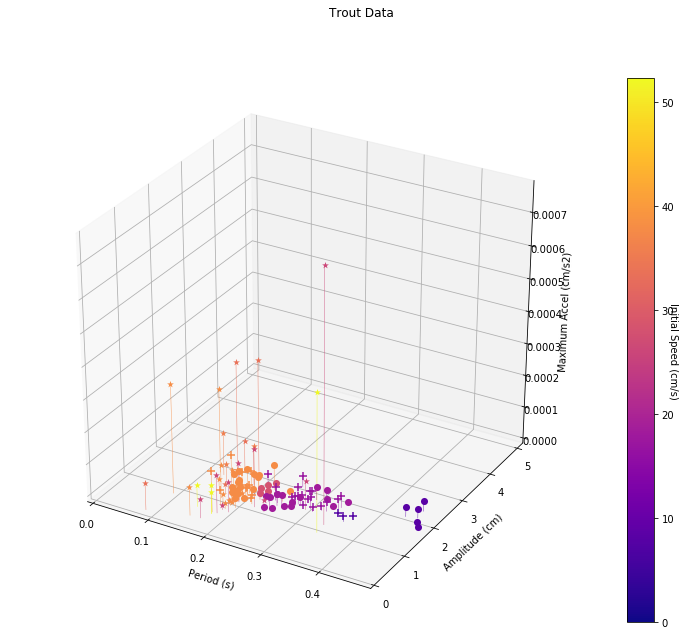

114


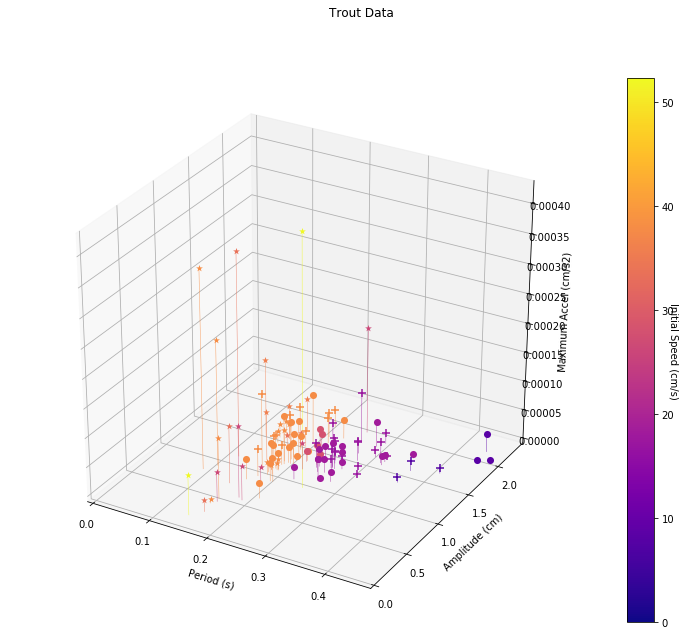

105


In [5]:
plot_analysis("Bass Data",bass_subset,finbeat_byP,tracklist)
plot_analysis("Bass Data",bass_subset,finbeat_byT,tracklist)
plot_analysis("Trout Data", trout_subset, finbeat_byP, tracklist)
plot_analysis("Trout Data", trout_subset, finbeat_byT, tracklist)

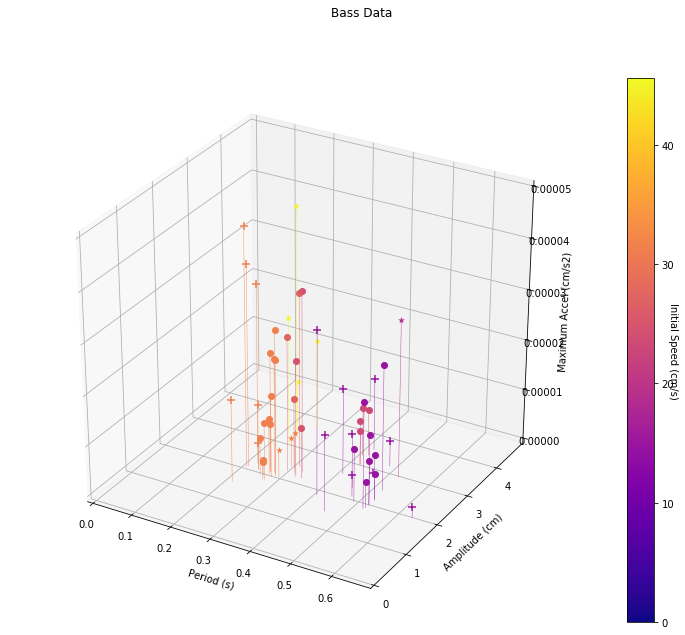

52


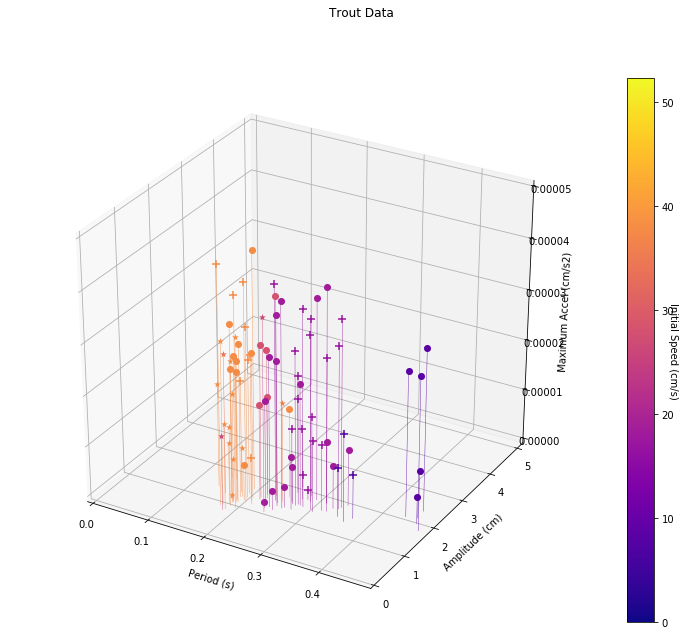

79


In [6]:
plot_analysis("Bass Data",bass_subset,finbeat_byP,tracklist,cutoff=True, lines=True)
plot_analysis("Trout Data",trout_subset,finbeat_byP,tracklist,cutoff=True, lines=True)

In [13]:
trout2_bursts = make_subset(group_by1='species', identifier1='BTrout', tracklist=tracklist, group_by2='behavior', identifier2='B', group_by3 ='fish', identifier3='BTrout2')
print(trout2_bursts)

['BTrout2S03', 'BTrout2S10', 'BTrout2S05', 'BTrout2S04', 'BTrout2S09', 'BTrout2S08', 'BTrout2S07']


In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


def plot_analysis_new(subset_name, finbeats_subset, finbeat_data, 
                  tracklist, zaxis='A', lines = True, cutoff = False):
    """Plots finbeats in (period, amplitude, acceleration) space.
    
    This function takes finbeat data from a specified output of 
    finbeat_calc(), and plots each individual finbeat in (period, 
    amplitude, maximum acceleration) space. The finbeat_data argument 
    specifies whether the finbeats to be plotted come from peak-to-peak 
    or trough-to-trough calculations. The maximum acceleration is the 
    maximum acceleration between the finbeat start and finbeat end 
    times. The number of total finbeats is printed at the end. 
    
    Args:
        subset_name (string): some string identifying what's in your
                                subset, to be used as the plot title
        finbeats_subset (list): a list of strings with the trial
                            names of the desired trials from finbeats.
                             Note: The list (even of a single
                             element) must be contained in square
                             brackets. You'll probably want to use
                             the subset generating function: 
                             make_subset()
        finbeat_data (dict): use either finbeat_byP to do analysis
                            on finbeats as defined by peaks first,
                            or finbeat_byT to use finbeats defined by
                            troughs first. These must be created
                            beforehand by the function finbeat_calc()
        zaxis (str): must be of value "A" or "V". Indicates whether to plot
                        acceleration or velocity.
        tracklist (dict): the compiled position, velocity,
                          and acceleration data for all trials
                           produced by extract_data()
        lines (Bool): if True, adds lines up from x-y plane to z_value
        cutoff (Bool): if True, cuts off z axis at hard-coded maximum value

    Returns:
        Nothing
    """
    count_n = 0  # start counting finbeats

    #find max initial speed for coloring by speed
    speeds = []
    for trial in finbeats_subset:
        speeds.append(tracklist[trial]['start_spd'])
    max_spd = max(speeds)

    # find x and y max and min axis limits
    x_vals = []
    y_vals = []
    z_vals = []
    for trial in finbeats_subset:
        for finbeat in finbeat_data[trial].index.values:
            x_vals.append(finbeat_data[trial]['period'][finbeat])
            y_vals.append(finbeat_data[trial]['amplitude'][finbeat])

    x_max = np.nanmax(x_vals)
    y_max = np.nanmax(y_vals)


    # Pull a colormap
    cm = plt.get_cmap("plasma")

    # Set up the figure and choose an appropriate z-axis label
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(13)
    fig.suptitle(subset_name)
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    ax1.set_xlabel('Period (s)')
    ax1.set_ylabel('Amplitude (cm)')
    ax1.zaxis.set_rotate_label(False)  # disable automatic rotation
    if zaxis == 'V':
        ax1.set_zlabel('Maximum Inst. Velocity(cm/s)', rotation = 270)
    else:
        ax1.set_zlabel('Maximum Accel (cm/s2)', rotation = 270)
    ax1.set_xlim3d(0, x_max)
    ax1.set_ylim3d(0, y_max)
   
    # for each trial of interest
    for trial in finbeats_subset:
        # for each finbeat within that trial
        for finbeat in finbeat_data[trial].index.values:
            # get the period
            # period_mask = finbeat_data[trial]['period'].loc[finbeat]
            period = finbeat_data[trial]['period'][finbeat]

            # get the amplitude
            # amplitude_mask = finbeat_data[trial]['amplitude'].loc[
            # finbeat]
            amplitude = finbeat_data[trial]['amplitude'][finbeat]

            # get the start time
            # start_mask = finbeat_data[trial]['time'].loc[finbeat]
            start = finbeat_data[trial]['time'][finbeat]
            # get the end time
            # end_mask = finbeat_data[trial]['endtime'].loc[finbeat]
            end = finbeat_data[trial]['endtime'][finbeat]

            # find the maximum acceleration or velocity in that time range
            if zaxis == 'A':
                zcolumn = tracklist[trial]['data'][
                            'pt1_net_a'][start:end].max()
                z_vals.append(zcolumn)
            elif zaxis == 'V':
                zcolumn = tracklist[trial]['data'][
                              'pt1_net_v'][start:end].max()
                z_vals.append(zcolumn)
            else:  # If they fuck up, make it acceleration
                zcolumn = tracklist[trial]['data'][
                              'pt1_net_a'][start:end].max()
                z_vals.append(zcolumn)

            # pull the initial speed and behavior
            init_spd = tracklist[trial]['start_spd']
            behavior_type = tracklist[trial]['behavior']
            if behavior_type == 'B':
                behavior = '*'
            elif behavior_type == 'A':
                behavior = '+'
            else:
                behavior = 'o'
            
            

            # add the point
            if cutoff == True and zaxis == 'A':
                z_max = 0.00005
            else:
                z_max = np.nanmax(z_vals)
            if zcolumn <= z_max and lines == True and zcolumn >=0:
                p = ax1.plot(xs=[period, period], ys=[amplitude, amplitude],
                         zs=[0, zcolumn],
                         linestyle='solid', c=cm(init_spd / max_spd),
                         alpha=0.8, linewidth=0.5)
                p = ax1.scatter3D(xs=period,
                              ys=amplitude,
                              zs=zcolumn,
                              zdir='z', s=50, marker=behavior, c=init_spd,
                              cmap = cm, edgecolor='none', vmin=0,
                              vmax=max_spd)
                count_n +=1             
                
        
    ax1.set_zlim3d(0, z_max)
    cbar = plt.colorbar(p)
    cbar.set_label('Initial Speed (cm/s)', rotation =270)
    plt.show()
    print(count_n)


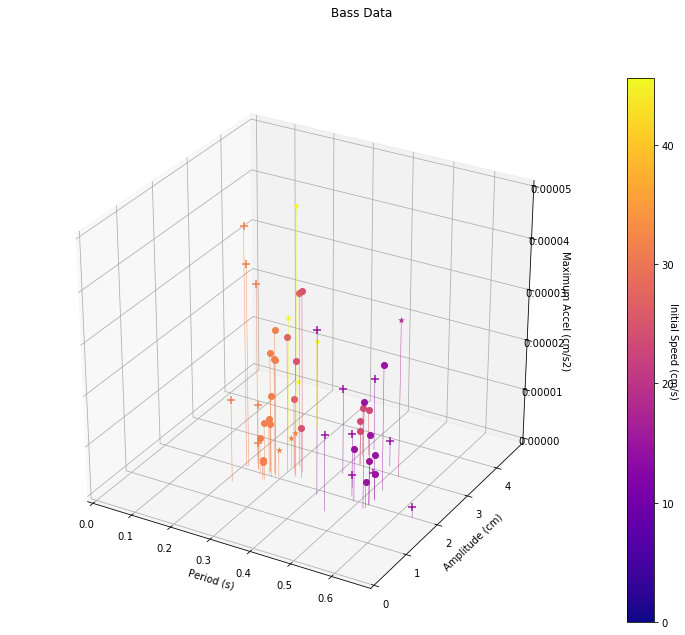

52


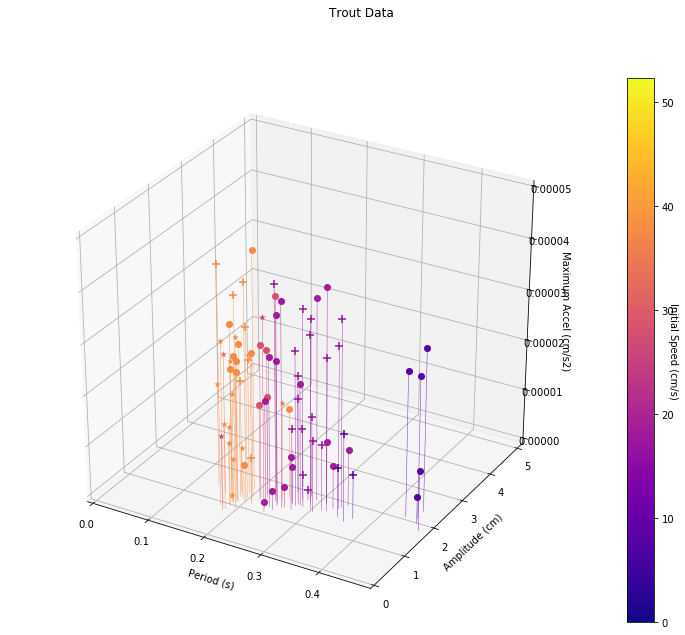

79


In [9]:
plot_analysis_new("Bass Data",bass_subset,finbeat_byP,tracklist,cutoff=True, lines=True)
plot_analysis_new("Trout Data",trout_subset,finbeat_byP,tracklist,cutoff=True, lines=True)

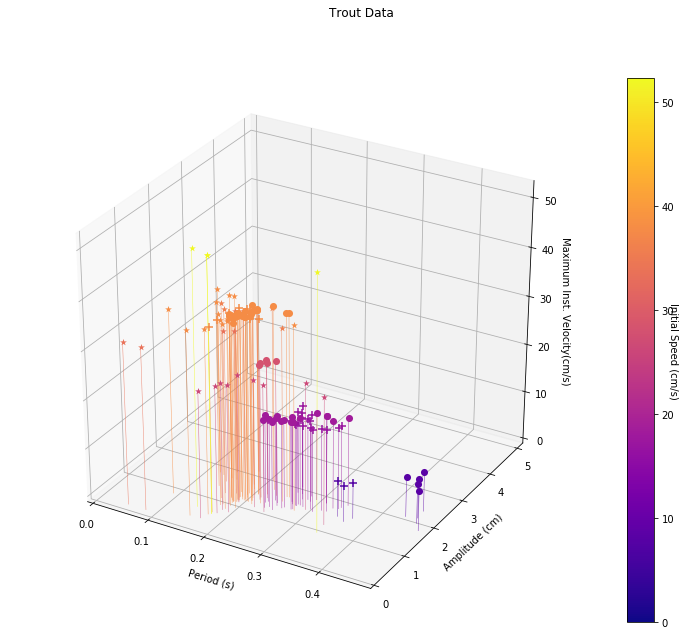

130


In [10]:
plot_analysis_new("Trout Data",trout_subset,finbeat_byP,tracklist,cutoff=False, lines=True, zaxis = 'V')

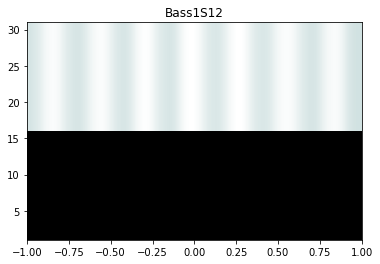

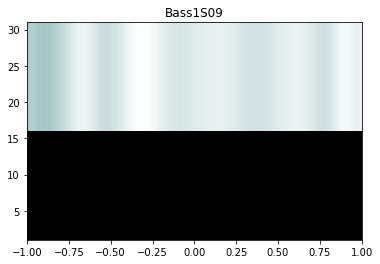

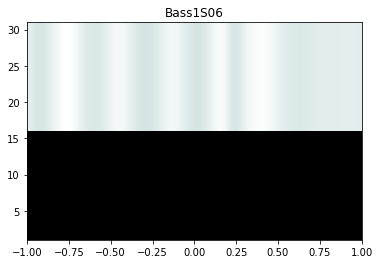

In [11]:
tracklist_subset = ['Bass1S12', 'Bass1S09', 'Bass1S06']


for trial in tracklist_subset:
    data = tracklist[trial]['data']['pt2y_smth']
    length = data.size
    FR = tracklist[trial]['FPS']
    sampling = 1.0/FR
    x = pylab.arange(0, 1, 1. / length)

    cA = []
    cD = []

    (cA, cD) = pywt.dwt(data,'sym20')

    pylab.title(trial)
    pylab.imshow((cA,cD), extent=[-1, 1, 1, 31], cmap='bone', aspect='auto') 
    pylab.show()


